In [2]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import feature_selection
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipe
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

c:\users\parth\pycharmprojects\jupyternotebook\jupyter-venv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
data = pd.read_csv('model.csv')
test = pd.read_csv('val.csv')

In [4]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [5]:
# Shape of training and testing dataset
print("Train set shape: ", data.shape)
print("Test set shape: ", test.shape)

Train set shape:  (94000, 31)
Test set shape:  (11500, 31)


In [6]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,...,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,...,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,...,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,...,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,...,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,...,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,...,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


In [7]:
# Confirming no null values exist
data.isnull().sum()

A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14        0
A15        0
A16        0
A17        0
A18        0
A19        0
A20        0
A21        0
A22        0
A23        0
A24        0
A25        0
A26        0
A27        0
A28        0
A29        0
A30        0
default    0
dtype: int64

We see here that there are no null values. All the columns are filled.

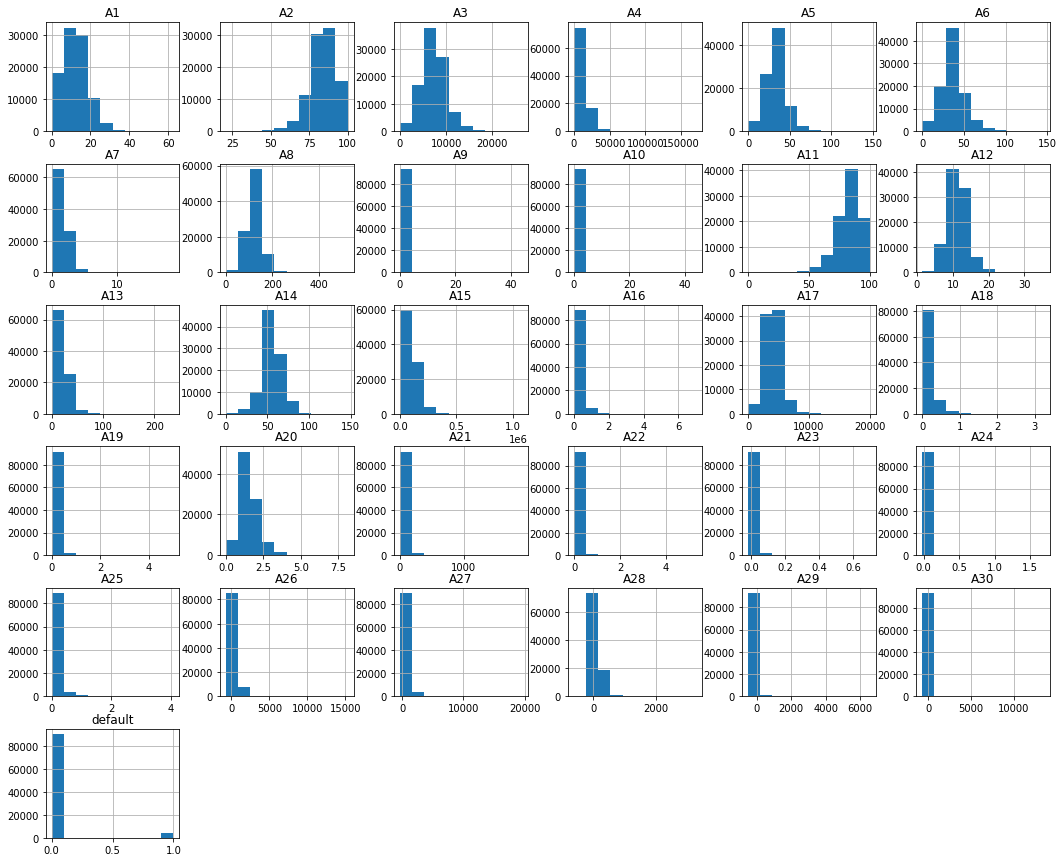

In [8]:
# Plotting histograms for all the variables
data.hist(figsize = (18,15))
plt.show()

We see a number of columns with similar distribution. We will need to look into the correltion of the columns with each other. We can also see that the target variable *default* has a high number of 0's (no default) and very less 1's (default) data points. We will need to handle this in order to avoid miscalculation of accuracy.

In [9]:
# Checking the number of data points for each class in the target variable
data['default'].value_counts()

0    90000
1     4000
Name: default, dtype: int64

We have 90000 examples of non-defaulters and only 4000 example of defaulters.

In [10]:
# Finding correlation of columns with the target
data_corr = data.corr()
data_corr['default'].sort_values(ascending=False).head(10)

default    1.000000
A1         0.224554
A5         0.180650
A6         0.178333
A7         0.166574
A13        0.150537
A16        0.137719
A14        0.126551
A18        0.122664
A19        0.113143
Name: default, dtype: float64

In [11]:
X = data.drop(['default'], axis = 1)
y = data['default']

C:\Users\parth\AppData\Local\Temp/ipykernel_16968/3239813396.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

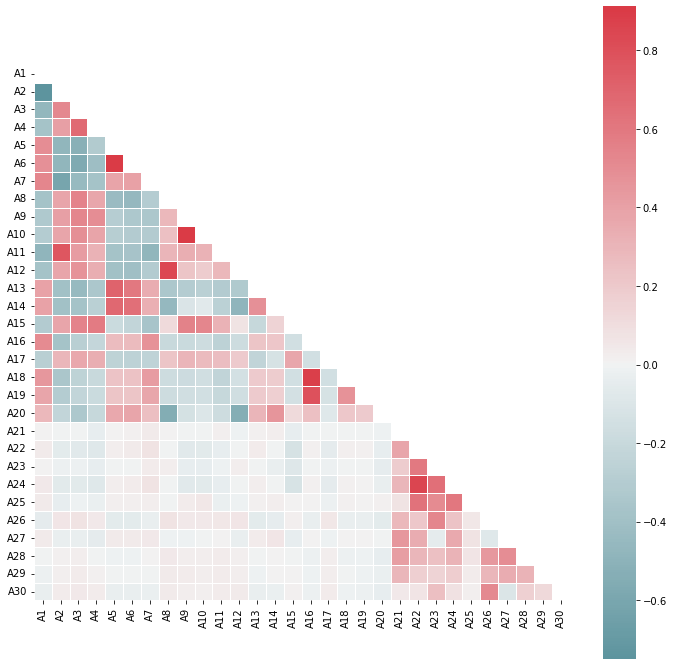

In [12]:
# Visualizing correlation between the variables
corr = X.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(210, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square = True, center = 0, linewidths=.5, ax=ax)

We see a number of columns to be correlated with each other. There are 30 columns, we can work on some form of feature selection.

In [13]:
# Testing PCA to bring down the number of components to 25
pca = PCA(n_components=20, random_state = 25)

principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data = principal_components)
principal_df.shape

(94000, 20)

C:\Users\parth\AppData\Local\Temp/ipykernel_16968/3846595814.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

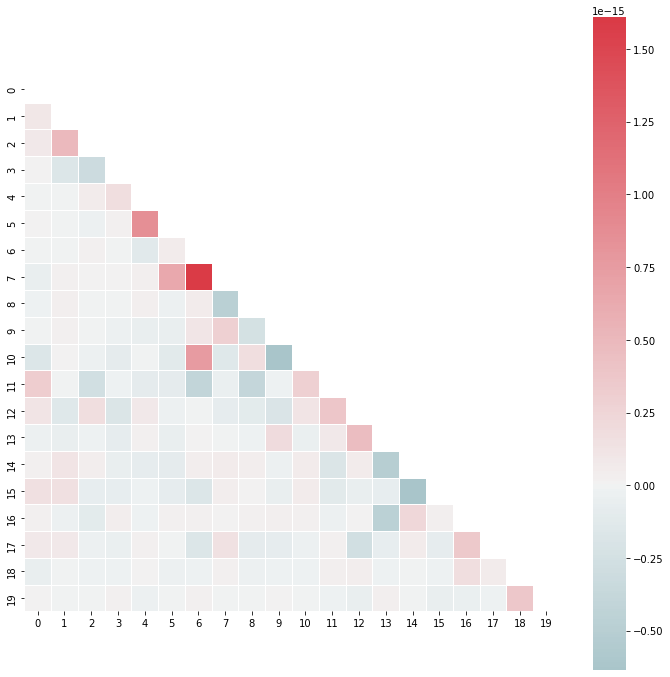

In [14]:
# Visualizing correlation between the variables
corr = principal_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.diverging_palette(210, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square = True, center = 0, linewidths=.5, ax=ax)

We see that decreasing the number of compnents to 20 from 30 brings down the corrrelation between the columns significantly. But we will need a more robust was to select the number of components we must use for our final model.

### Fitting a Logistic Regression Pipeline

In [42]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=12)

In [43]:
print(X_train.shape)
print(X_test.shape)

(79900, 30)
(14100, 30)


In [73]:
# Creating a table to track results
results = pd.DataFrame(columns=["Experiment Name", "Cross fold train AUC", "Val AUC"])

In [44]:
# Defining steps for the Pipeline
steps = [('scaler',StandardScaler()),('sampling', SMOTE()), ('PCA',PCA()), ('clf',LogisticRegression())]

# Defining parameter grid for grid search
param_grid = {
    'PCA__n_components': [5, 10, 15, 25],
    'clf__penalty': ('l1', 'l2'),
    'clf__tol': (0.0001, 0.00001, 0.0000001), 
    'clf__C': (10, 1, 0.1, 0.01),
}

lr_pipe = imb_pipe(steps = steps)

# K fold 
strat_kf = StratifiedKFold(n_splits=5,
                           shuffle=True,
                           random_state=11)
    
lr_gs = GridSearchCV(lr_pipe, param_grid, scoring='roc_auc', cv = strat_kf, n_jobs=-1, verbose = 2)
lr_gs.fit(X_train, y_train)
print("Score for the model with best parameters:", round(lr_gs.best_score_, 3))
print("Best parameters: ", lr_gs.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


c:\users\parth\pycharmprojects\jupyternotebook\jupyter-venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\parth\pycharmprojects\jupyternotebook\jupyter-venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\parth\pycharmprojects\jupyternotebook\jupyter-venv\lib\site-packages\imblearn\pipeline.py", line 272, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\users\parth\pycharmprojects\jupyternot

Score for the model with best parameters: 0.812
Best parameters:  {'PCA__n_components': 25, 'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__tol': 1e-05}


Here we see that the Logistic Regression model gives us an AUC score of 0.812, along with the best parameters for the model.

In [45]:
y_pred = lr_gs.best_estimator_.predict(X_test)
y_pred_probs = lr_gs.best_estimator_.predict_proba(X_test)
print("AUC Score on the test set: ", round(roc_auc_score(y_test, y_pred_probs[:,1]), 3))

AUC Score on the test set:  0.806


In [74]:
results.loc[0] = ["Logistic Regression", round(lr_gs.best_score_, 3), round(roc_auc_score(y_test, y_pred_probs[:,1]), 3)]

In [75]:
results

,Experiment Name,Cross fold train AUC,Val AUC
0,Logistic Regression,0.812,0.806


We are getting an AUC score of 0.806 on the held out test (validation) set created during the test train split. This is close to the validation score of 0.811 that we got during cross fold validation. Now we will test other models similarly using grid search.

### Naive Bayes

In [31]:
# Defining steps for the Pipeline
steps = [('scaler',StandardScaler()),('sampling', SMOTE()), ('PCA',PCA()), ('nb',GaussianNB())]

nb_pipe = imb_pipe(steps = steps)

# K fold 
strat_kf = StratifiedKFold(n_splits=3,shuffle=True, random_state=11)
    
nb_gs = GridSearchCV(nb_pipe, param_grid = {}, scoring='roc_auc', cv = strat_kf, n_jobs=-1, verbose = 2)
nb_gs.fit(X_train, y_train)
print("Score for the model with best parameters:", round(nb_gs.best_score_, 3))
print("Best parameters: ", nb_gs.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Score for the model with best parameters: 0.699
Best parameters:  {}


In [32]:
y_pred = nb_gs.best_estimator_.predict(X_test)
y_pred_probs = nb_gs.best_estimator_.predict_proba(X_test)
print("AUC Score on the test set: ", round(roc_auc_score(y_test, y_pred_probs[:,1]), 3))

AUC Score on the test set:  0.718


In [33]:
results.loc[2] = ["Gaussian NB", round(nb_gs.best_score_, 3), round(roc_auc_score(y_test, y_pred_probs[:,1]), 3)]

In [34]:
results

,Experiment Name,Cross fold train AUC,Val AUC
0,Logistic Regression,0.812,0.806
1,Gaussian NB,0.699,0.718


### K-Nearest Neighbors

In [ ]:
# Defining steps for the Pipeline
steps = [('scaler',StandardScaler()),('sampling', SMOTE()), ('PCA',PCA()), ('knn',KNeighborsClassifier())]

# Defining parameter grid for grid search
param_grid = {
    'PCA__n_components': [5, 10, 15, 25],
    "knn__weights": ['uniform', 'distance'],
    "knn__n_neighbors" : [2,7],
    "knn__p":[1,2]
}

knn_pipe = imb_pipe(steps = steps)

# K fold 
strat_kf = StratifiedKFold(n_splits=5,shuffle=True, random_state=11)
    
knn_gs = GridSearchCV(knn_pipe, param_grid, scoring='roc_auc', cv = strat_kf, n_jobs=-1, verbose = 2)
knn_gs.fit(X_train, y_train)
print("Score for the model with best parameters:", round(knn_gs.best_score_, 3))
print("Best parameters: ", knn_gs.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Score for the model with best parameters: 0.722
Best parameters:  {'PCA__n_components': 15, 'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}


In [46]:
y_pred = knn_gs.best_estimator_.predict(X_test)
y_pred_probs = knn_gs.best_estimator_.predict_proba(X_test)
print("AUC Score on the test set: ", round(roc_auc_score(y_test, y_pred_probs[:,1]), 3))

AUC Score on the test set:  0.715


In [76]:
results.loc[2] = ["KNN", round(knn_gs.best_score_, 3), round(roc_auc_score(y_test, y_pred_probs[:,1]), 3)]

In [77]:
results

,Experiment Name,Cross fold train AUC,Val AUC
0,Logistic Regression,0.812,0.806
1,Gaussian NB,0.699,0.718
2,KNN,0.722,0.715


### Random Forest Classifier

In [21]:
# Defining steps for the Pipeline
steps = [('sampling', SMOTE()), ('PCA',PCA(n_components = 20)), ('rf',RandomForestClassifier())]

# Defining parameter grid for grid search
param_grid = {
        'rf__max_depth': [None],
        'rf__max_features': [1, 3, 10],
        'rf__min_samples_split': [5, 10, 15],
        'rf__min_samples_leaf': [3, 5, 10],
        'rf__bootstrap': [False],
        'rf__n_estimators':[80, 150, 200, 300],
        'rf__criterion':['gini','entropy']
}

rf_pipe = imb_pipe(steps = steps)

# K fold 
strat_kf = StratifiedKFold(n_splits=3,shuffle=True, random_state=11)
    
rf_gs = GridSearchCV(rf_pipe, param_grid, scoring='roc_auc', cv = strat_kf, n_jobs=-1, verbose = 2)
rf_gs.fit(X_train, y_train)
print("Score for the model with best parameters:", round(rf_gs.best_score_, 3))
print("Best parameters: ", rf_gs.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Score for the model with best parameters: 0.799
Best parameters:  {'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': None, 'rf__max_features': 3, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}


In [22]:
y_pred = rf_gs.best_estimator_.predict(X_test)
y_pred_probs = rf_gs.best_estimator_.predict_proba(X_test)
print("AUC Score on the test set: ", round(roc_auc_score(y_test, y_pred_probs[:,1]), 3))

AUC Score on the test set:  0.807


In [30]:
results.loc[3] = ["Random Forest Classifier", round(rf_gs.best_score_, 3), round(roc_auc_score(y_test, y_pred_probs[:,1]), 3)]

In [31]:
results

,Experiment Name,Cross fold train AUC,Val AUC
0,Logistic Regression,0.812,0.806
1,Gaussian NB,0.699,0.718
2,KNN,0.722,0.715
3,Random Forest Classifier,0.799,0.807


In [19]:
# Defining steps for the Pipeline
steps = [('sampling', SMOTE()), ('PCA',PCA()), ('xgb',XGBClassifier())]

# Defining parameter grid for grid search
param_grid = {
    'PCA__n_components': [5, 10, 15, 25],
    'xgb__max_depth': [2, 3, 5, 7, 10],
    'xgb__n_estimators': [10, 100, 500],
}

xgb_pipe = imb_pipe(steps = steps)

# K fold 
strat_kf = StratifiedKFold(n_splits=3,shuffle=True, random_state=11)
    
xgb_gs = GridSearchCV(xgb_pipe, param_grid, scoring='roc_auc', cv = strat_kf, n_jobs=-1, verbose = 2)
xgb_gs.fit(X_train, y_train)
print("Score for the model with best parameters:", round(xgb_gs.best_score_, 3))
print("Best parameters: ", xgb_gs.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\users\parth\pycharmprojects\jupyternotebook\jupyter-venv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:40:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score for the model with best parameters: 0.786
Best parameters:  {'PCA__n_components': 25, 'xgb__max_depth': 2, 'xgb__n_estimators': 100}


In [35]:
y_pred = xgb_gs.best_estimator_.predict(X_test)
y_pred_probs = xgb_gs.best_estimator_.predict_proba(X_test)
print("AUC Score on the test set: ", round(roc_auc_score(y_test, y_pred_probs[:,1]), 3))

AUC Score on the test set:  0.794


In [36]:
results.loc[4] = ["XGBoost", round(xgb_gs.best_score_, 3), round(roc_auc_score(y_test, y_pred_probs[:,1]), 3)]

In [61]:
results

,Experiment Name,Cross fold train AUC,Val AUC
0,Logistic Regression,0.812,0.806
1,Gaussian NB,0.699,0.718
2,KNN,0.722,0.715
3,Random Forest Classifier,0.799,0.807
4,XGBoost,0.786,0.794


### Predicting on the unseen Test Data using the 2 Models (Logistic Regression and Random Forests)

In [38]:
X_test_unseen = test.drop(['default'], axis = 1)
y_test_unseen = test['default']

In [46]:
y_pred_probs_lr = lr_gs.best_estimator_.predict_proba(X_test_unseen)
print("AUC score on the unseen test set: ", round(roc_auc_score(y_test_unseen, y_pred_probs_lr[:,1]), 3))

AUC score on the unseen test set:  0.819


In [47]:
y_pred_probs_rf = rf_gs.best_estimator_.predict_proba(X_test_unseen)
print("AUC score on the unseen test set: ", round(roc_auc_score(y_test_unseen, y_pred_probs_rf[:,1]), 3))

AUC score on the unseen test set:  0.806


In [58]:
np.savetxt("result1.csv",y_pred_probs_lr[:,1], delimiter=",")

In [59]:
np.savetxt("result2.csv",y_pred_probs_rf[:,1], delimiter=",")